In [82]:
import shapely
import rasterio
from shapely.geometry import Point
import geopandas as gpd
import pandas as pd

In [8]:
with rasterio.open('reprojected.tif') as rst:
    print(rst.crs)
    bounds = rst.bounds

EPSG:27700


In [138]:
xmin, ymax, xmax, ymin = 213005, 776124, 219870, 767525

In [12]:
xmin,ymin,xmax,ymax = bounds

In [28]:
lst = [Point(x, int(ymin)) for x in range(int(xmin+1), int(xmax-1), 30)]




In [29]:
print(lst[0], lst[1], lst[40])

POINT (144276 571365) POINT (144306 571365) POINT (145476 571365)


In [149]:
x_list = []
y_list = []
group = []

# iterate over bounding box area
# bbox values to int and subtract/add 1 to ensure rounded points fall within raster

for count, y in enumerate(range(int(ymin), int(ymax), 120)):
    for x in range(int(xmin), int(xmax), 30):
        x_list.append(x)
        y_list.append(y)
        group.append(count)

        
with rasterio.open('merged_bng.tif') as src:
    z_list = [z[0] for z in src.sample(zip(x_list, y_list))]
    

In [152]:
with rasterio.open('merged_bng.tif') as src:
    z_list = [z[0] for z in src.sample(zip(x_list, y_list))]

In [163]:
df = pd.DataFrame(
    {
        'group': count,
        'x_coord': x_list,
        'y_coord': y_list,
        'z_coord': z_list,
    })

In [165]:
df['shifted_y'] = df.y_coord + df.z_coord

In [167]:
gdf = gpd.GeoDataFrame(df, crs=27700, geometry=gpd.points_from_xy(df.x_coord, df.shifted_y))

<AxesSubplot:>

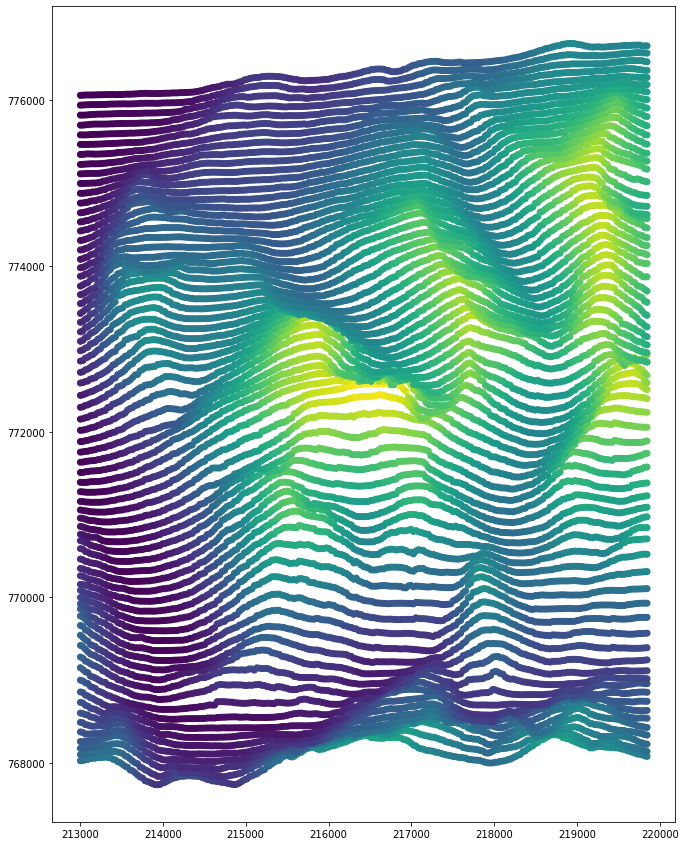

In [169]:
gdf.plot(column='z_coord', cmap='viridis', figsize=(15,15))

In [171]:
gdf.head()

group  x_coord  y_coord  z_coord  shifted_y                       geometry
0     71   213005   767525      503     768028  POINT (213005.000 768028.000)
1     71   213035   767525      507     768032  POINT (213035.000 768032.000)
2     71   213065   767525      515     768040  POINT (213065.000 768040.000)
3     71   213095   767525      519     768044  POINT (213095.000 768044.000)
4     71   213125   767525      530     768055  POINT (213125.000 768055.000)

In [175]:
gdf2 = gdf.groupby(['y_coord'])['geometry'].apply(lambda x: LineString(x.tolist()))
gdf2 = gpd.GeoDataFrame(gdf2, crs=27700, geometry='geometry')

<AxesSubplot:>

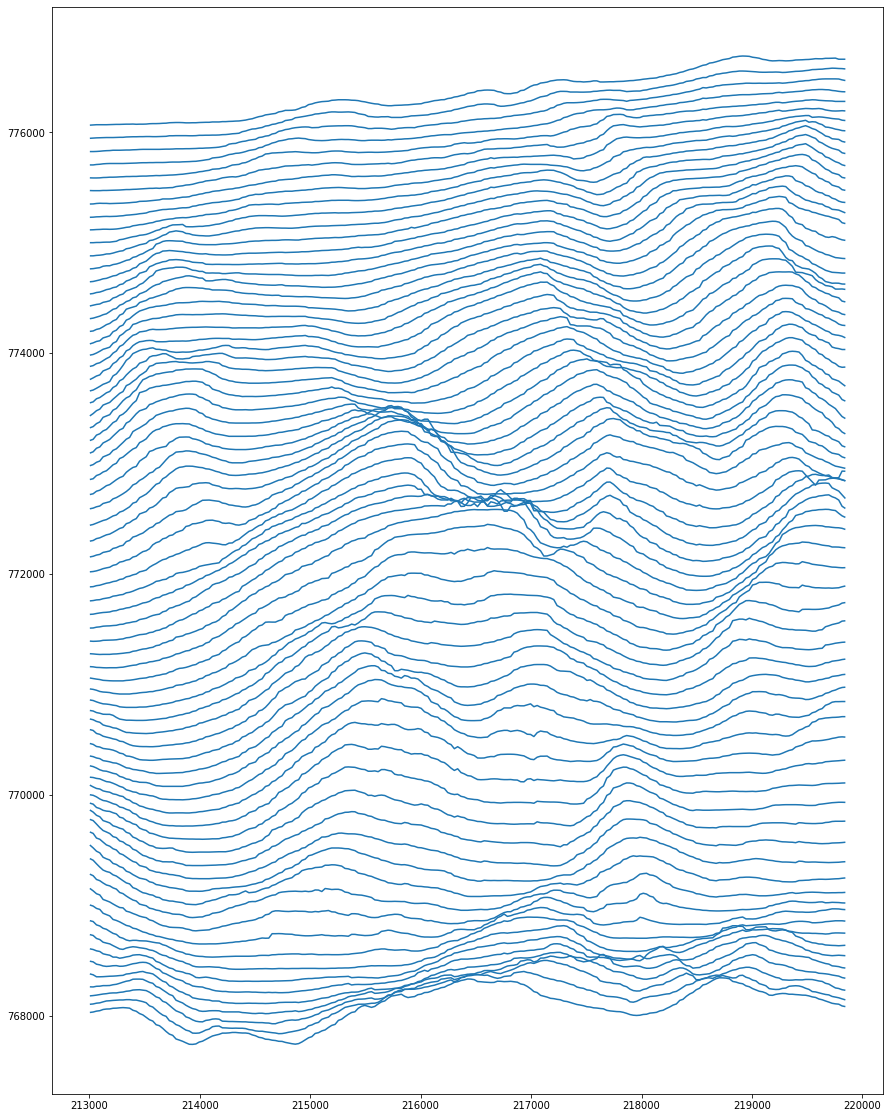

In [177]:
gdf2.plot(figsize=(20,20))

In [86]:
df = pd.DataFrame(
    {'x_coord': x_list,
     'y_coord': y_list,
    })

In [74]:
gdf = gpd.GeoDataFrame(crs='epsg:27700', geometry=coord_list)

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
from rasterio.plot import show

In [38]:
dem = rasterio.open('reprojected.tif')

<AxesSubplot:>

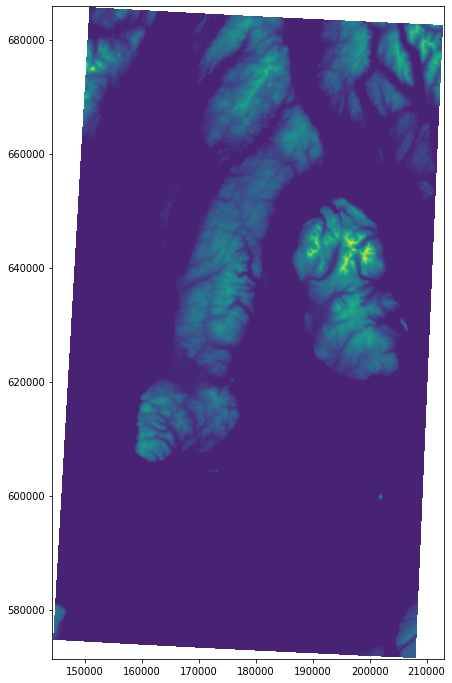

In [41]:
fig, ax = plt.subplots(figsize=(12,12))
show(dem, ax=ax)

In [75]:
gdf['x_coord'] = gdf.geometry.x
gdf['y_coord'] = gdf.geometry.y

In [49]:
gdf.head()

geometry   x_coord   y_coord
0  POINT (144276.000 571366.000)  144276.0  571366.0
1  POINT (144306.000 571366.000)  144306.0  571366.0
2  POINT (144336.000 571366.000)  144336.0  571366.0
3  POINT (144366.000 571366.000)  144366.0  571366.0
4  POINT (144396.000 571366.000)  144396.0  571366.0

In [76]:
coords = [(x,y) for x, y in zip(gdf.x_coord, gdf.y_coord)]

In [87]:
with rasterio.open('reprojected.tif') as src:
    df['z_coord'] = [x[0] for x in src.sample(zip(df.x_coord, df.y_coord))]

In [78]:
len(gdf[gdf['z_coord']> 0])

123412

In [101]:
df = df[df['z_coord'] > -20]

In [103]:
df['translate_y'] = df['y_coord'] + df['z_coord']

In [104]:
gdf = gpd.GeoDataFrame(df, crs=27700, geometry=gpd.points_from_xy(df.x_coord, df.translate_y))

ValueError: 'Viridis' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

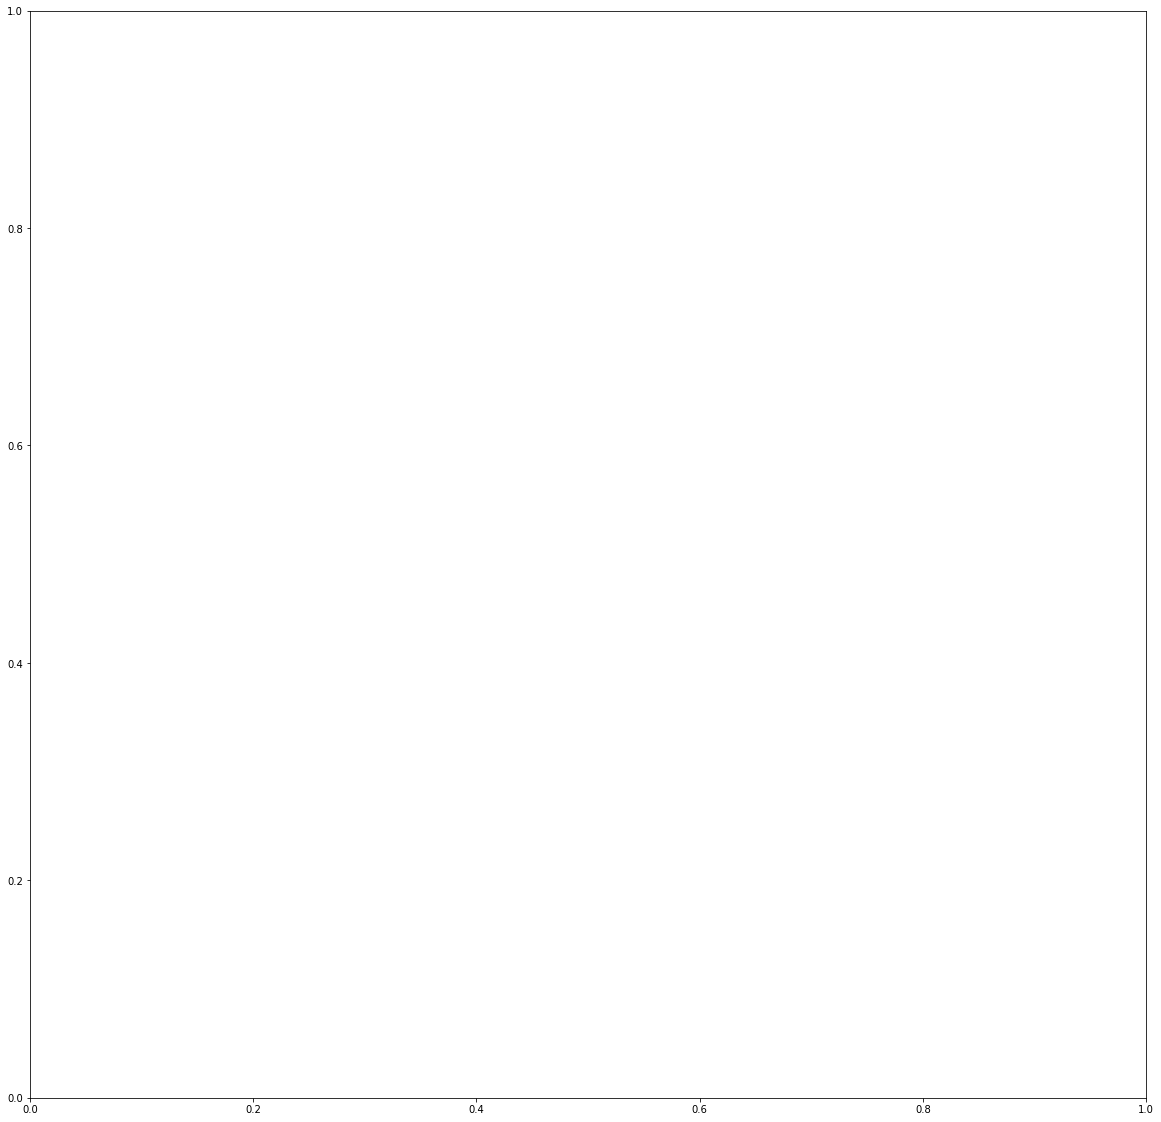

In [102]:
df.plot(column='z_coord', cmap='Viridis', figsize=(20,20))

In [59]:
gdf.head()

geometry   x_coord   y_coord  z_coord
0  POINT (144276.000 571366.000)  144276.0  571366.0   -32768
1  POINT (144306.000 571366.000)  144306.0  571366.0   -32768
2  POINT (144336.000 571366.000)  144336.0  571366.0   -32768
3  POINT (144366.000 571366.000)  144366.0  571366.0   -32768
4  POINT (144396.000 571366.000)  144396.0  571366.0   -32768

<AxesSubplot:>

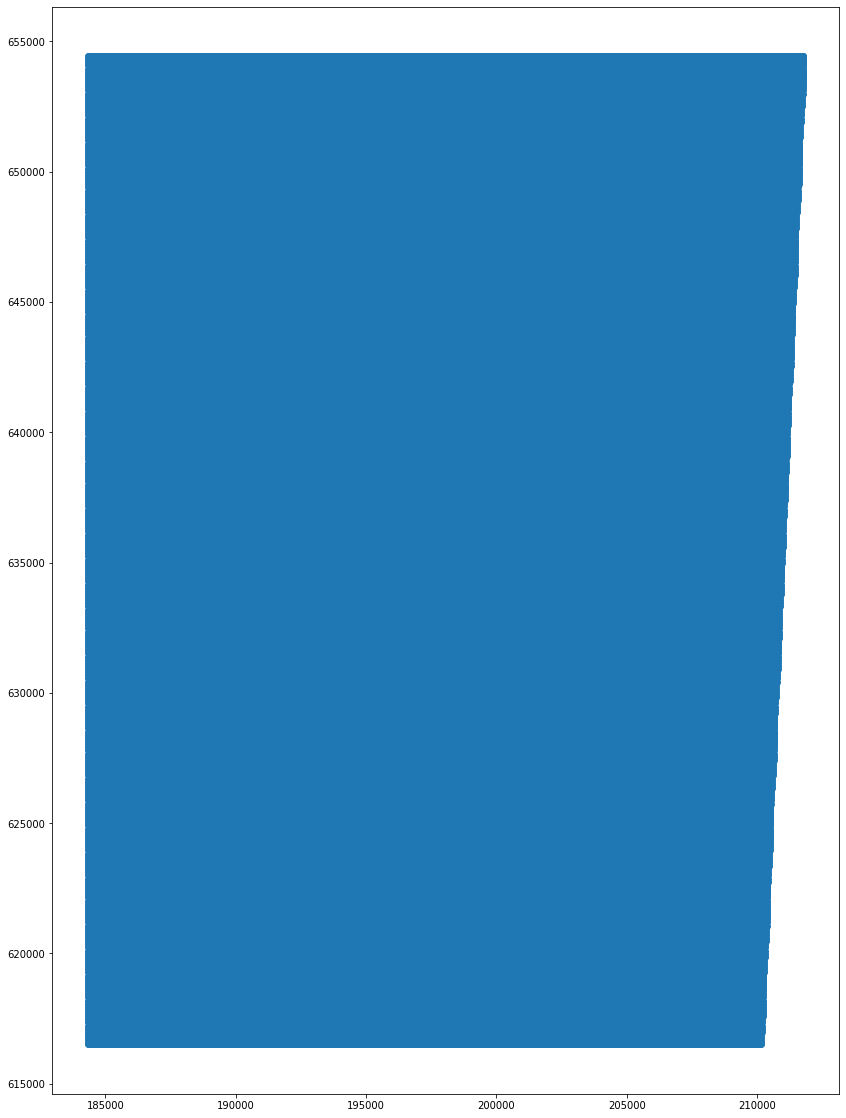

In [80]:
gdf[gdf['z_coord']> -32768].plot(figsize=(20,20))

In [81]:
gdf.z_coord.max()

852.0

In [65]:
((xmax - xmin)/30)*((ymax-ymin)/120)

2185807.2774430416

In [72]:
xmin, ymax = 184329, 654487
xmax, ymin = 214068, 616513

In [67]:
len(lst)

2292

In [107]:
from shapely.geometry import LineString

In [109]:
gdf2 = gdf.groupby(['y_coord'])['geometry'].apply(lambda x: LineString(x.tolist()))
gdf2 = gpd.GeoDataFrame(gdf2, geometry='geometry')

In [133]:
gdf2.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

<AxesSubplot:>

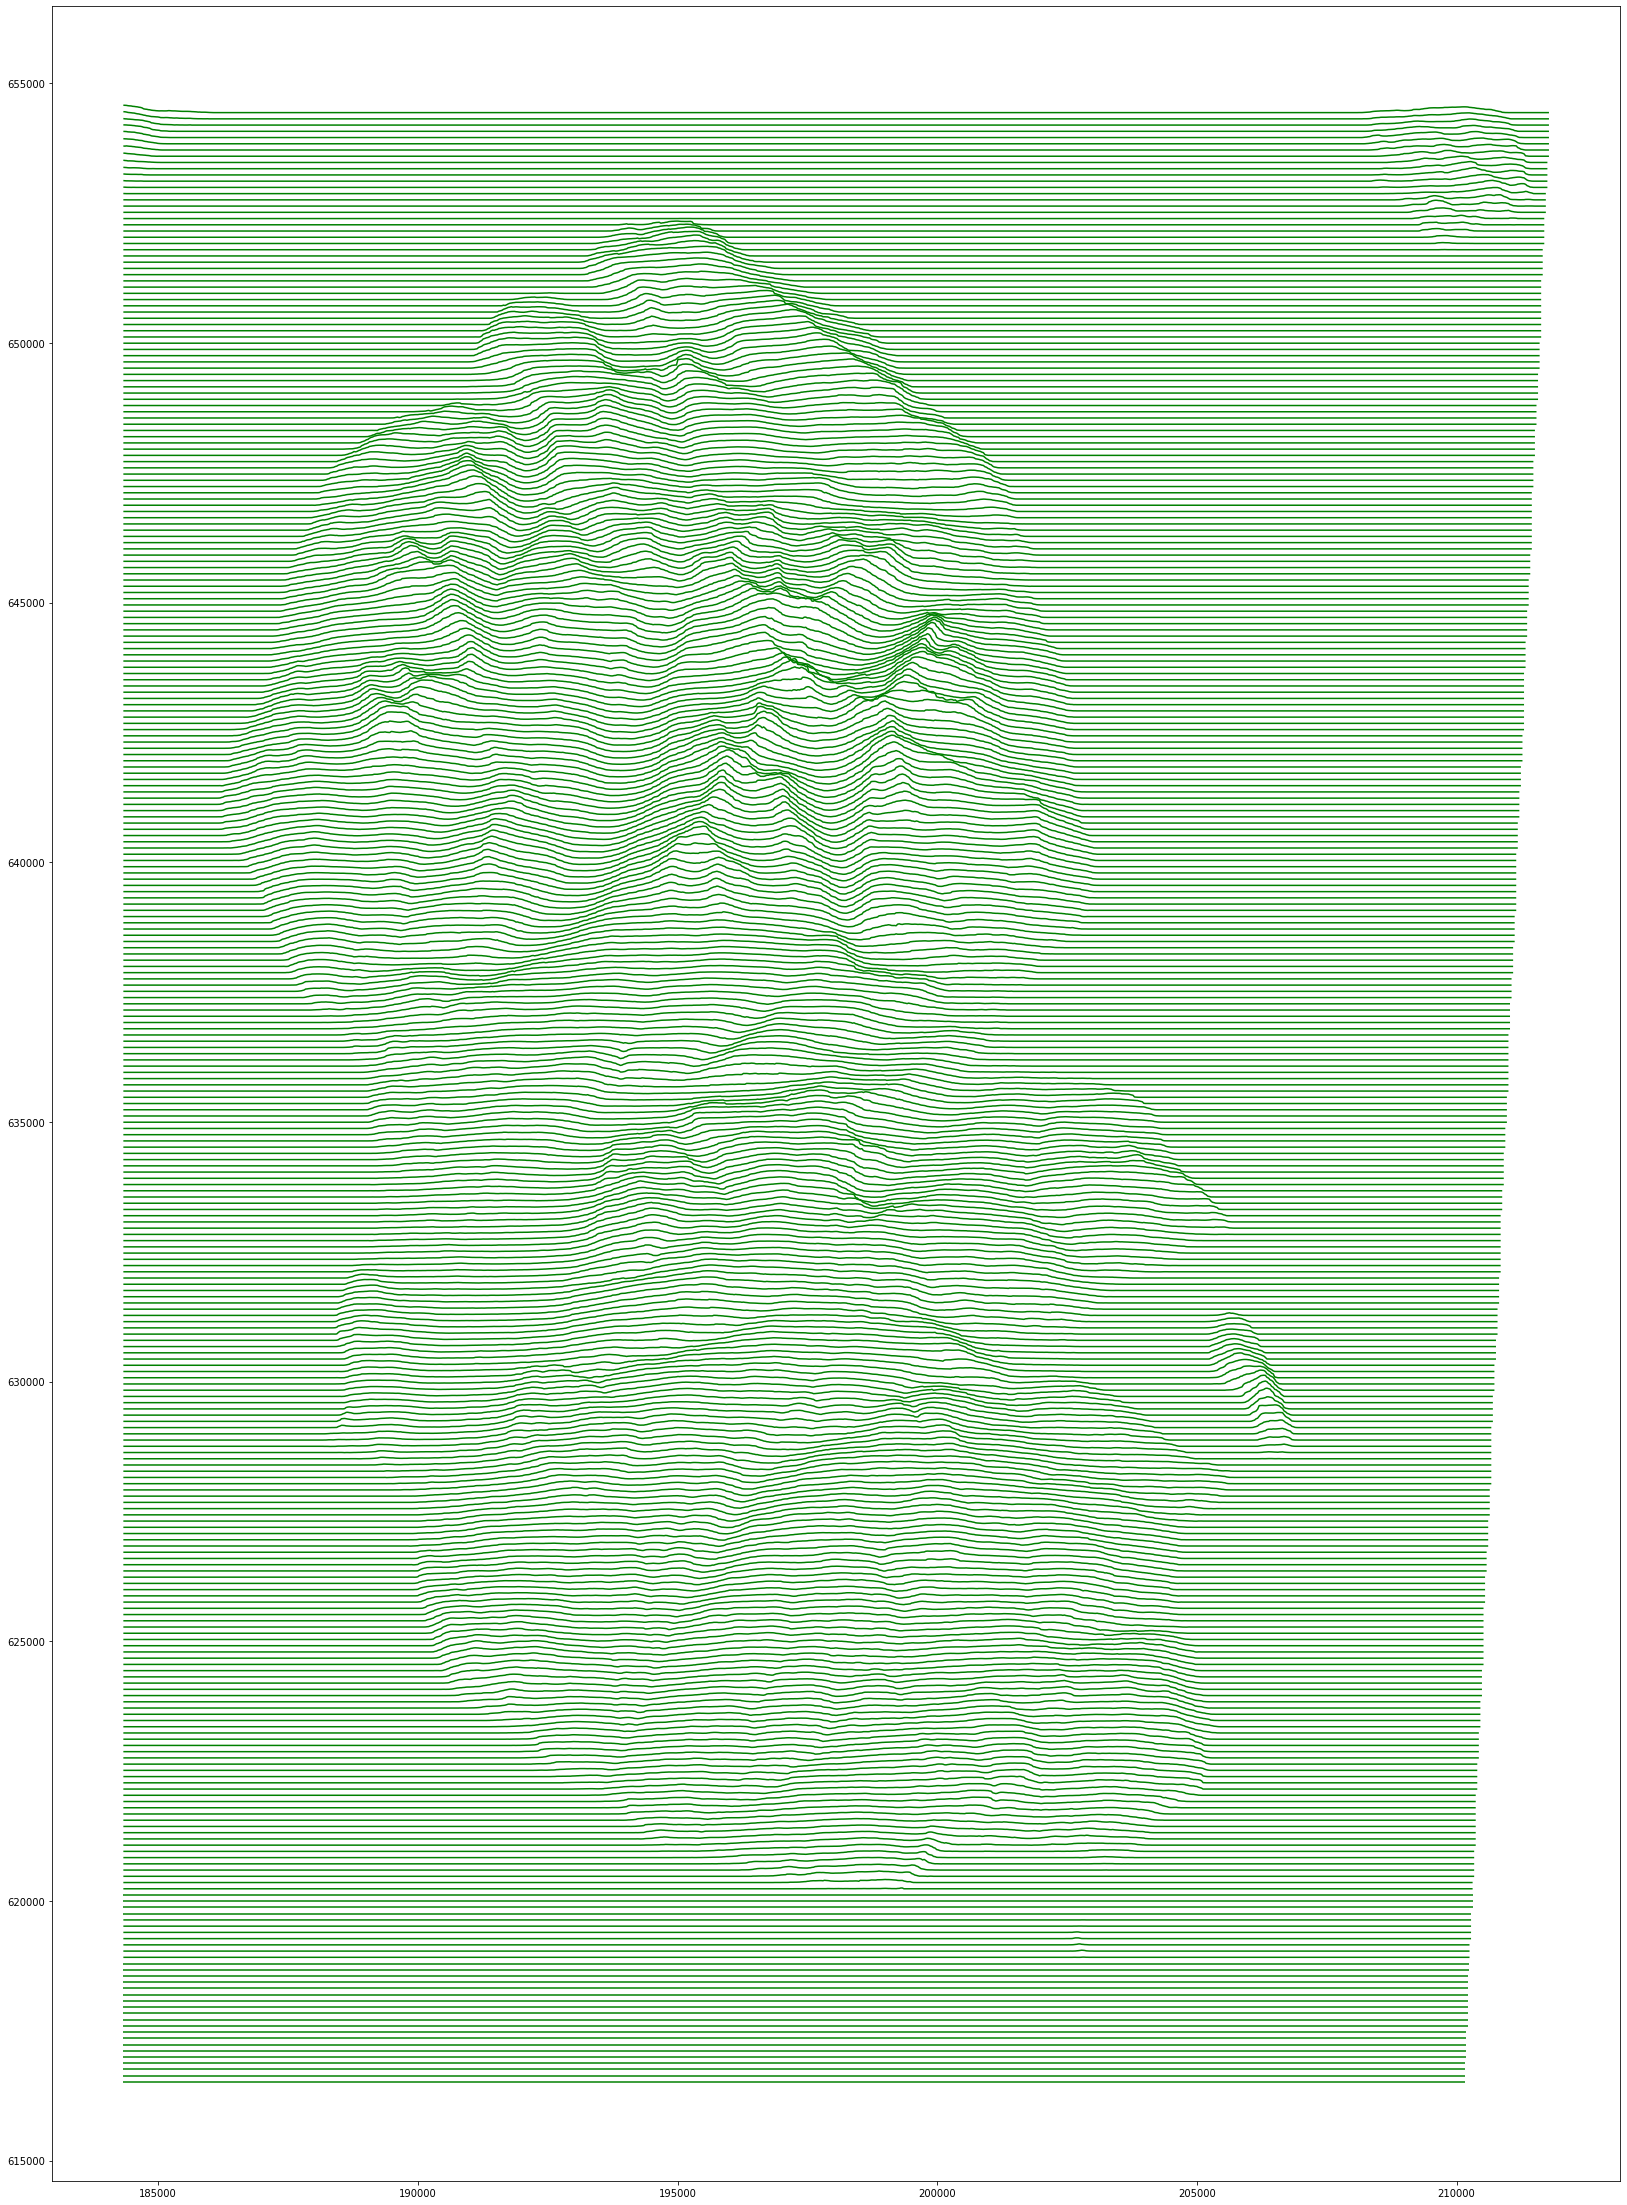

In [132]:
gdf2.plot(color='Green', figsize=(40,40))

<AxesSubplot:>

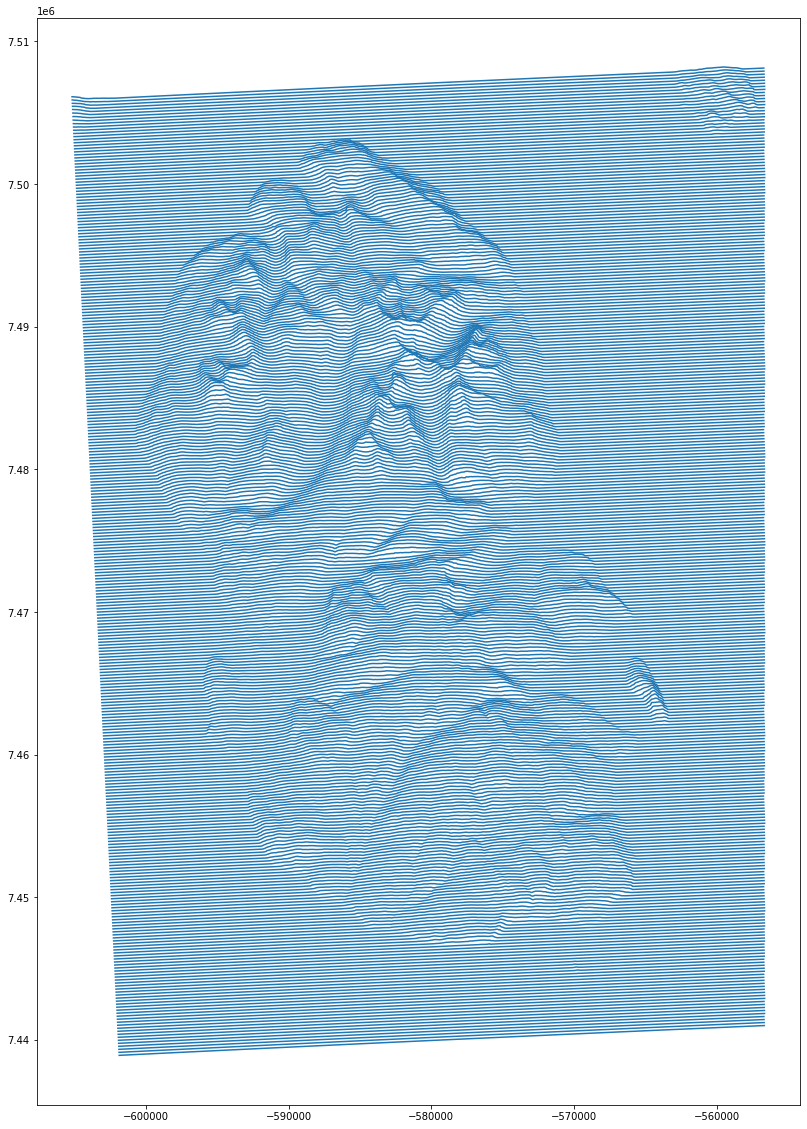

In [137]:
gdf2.to_crs('epsg:3857').plot(figsize=(20,20))